In [1]:
#Get the data 
!wget https://raw.githubusercontent.com/tisljaricleo/GPS-visualization-Python/main/data.csv

--2021-04-04 06:02:14--  https://raw.githubusercontent.com/tisljaricleo/GPS-visualization-Python/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 701539 (685K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 685.10K  --.-KB/s    in 0.04s   

2021-04-04 06:02:14 (18.5 MB/s) - ‘data.csv’ saved [701539/701539]



In [2]:
#Get the map
!wget https://raw.githubusercontent.com/tisljaricleo/GPS-visualization-Python/main/map.png

--2021-04-04 06:03:26--  https://raw.githubusercontent.com/tisljaricleo/GPS-visualization-Python/main/map.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 617438 (603K) [image/png]
Saving to: ‘map.png’

map.png             100%[===================>] 602.97K  --.-KB/s    in 0.04s   

2021-04-04 06:03:26 (16.3 MB/s) - ‘map.png’ saved [617438/617438]



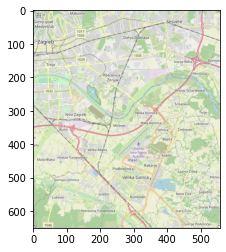

In [6]:
img =plt.imread('map.png')
imgplot = plt.imshow(img)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


class GPSVis(object):
    """
        Class for GPS data visualization using pre-downloaded OSM map in image format.
    """
    def __init__(self, data_path, map_path, points):
        """
        :param data_path: Path to file containing GPS records.
        :param map_path: Path to pre-downloaded OSM map in image format.
        :param points: Upper-left, and lower-right GPS points of the map (lat1, lon1, lat2, lon2).
        """
        self.data_path = data_path
        self.points = points
        self.map_path = map_path

        self.result_image = Image
        self.x_ticks = []
        self.y_ticks = []

    def plot_map(self):
        
        self.get_ticks()
        fig, axis1 = plt.subplots(figsize=(10, 10))
        axis1.imshow(self.result_image)
        axis1.set_xlabel('Longitude')
        axis1.set_ylabel('Latitude')
        axis1.set_xticklabels(self.x_ticks)
        axis1.set_yticklabels(self.y_ticks)
        axis1.grid()
        plt.show()

    def create_image(self, color, width=2):
        
        data = pd.read_csv(self.data_path, names=['LATITUDE', 'LONGITUDE'], sep=',')

        self.result_image = Image.open(self.map_path, 'r')
        img_points = []
        gps_data = tuple(zip(data['LATITUDE'].values, data['LONGITUDE'].values))
        for d in gps_data:
            x1, y1 = self.scale_to_img(d, (self.result_image.size[0], self.result_image.size[1]))
            img_points.append((x1, y1))
        draw = ImageDraw.Draw(self.result_image)
        draw.line(img_points, fill=color, width=width)

    def scale_to_img(self, lat_lon, h_w):
        
        # https://gamedev.stackexchange.com/questions/33441/how-to-convert-a-number-from-one-min-max-set-to-another-min-max-set/33445
        old = (self.points[2], self.points[0])
        new = (0, h_w[1])
        y = ((lat_lon[0] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        old = (self.points[1], self.points[3])
        new = (0, h_w[0])
        x = ((lat_lon[1] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        # y must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        return int(x), h_w[1] - int(y)

    def get_ticks(self):
        
        self.x_ticks = map(
            lambda x: round(x, 4),
            np.linspace(self.points[1], self.points[3], num=7))
        y_ticks = map(
            lambda x: round(x, 4),
            np.linspace(self.points[2], self.points[0], num=8))
        # Ticks must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        self.y_ticks = sorted(y_ticks, reverse=True)


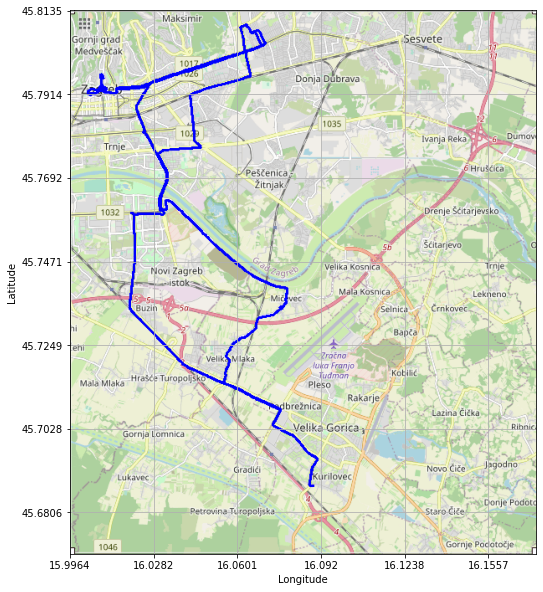

In [4]:
vis = GPSVis(data_path='data.csv',
             map_path='map.png',  # Path to map downloaded from the OSM.
             points=(45.8357, 15.9645, 45.6806, 16.1557)) # Two coordinates of the map (upper left, lower right)

vis.create_image(color=(0, 0, 255), width=3)  # Set the color and the width of the GNSS tracks.
vis.plot_map()

